In [80]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from scipy import signal
import sys

In [81]:
direc = r"../dataFolders/PaperPipelineOutput/RawTracks/"
visitnum = 'FirstVisit/'
# for visitnum in ['FirstVisit/', 'LastVisit/']:
    
path = os.path.join(direc, visitnum)
trackslist = glob.glob(path + '*.csv')

In [111]:
name = []
likelihood = []
maximum = []
for data in trackslist:
    
#     data = trackslist[0]
    n = os.path.basename(data)[:-4]

    file = pd.read_csv(data)
    x = file.x.values
    y = file.y.values
    
    if x.size == 0 & y.size == 0:
        print(n + 'has empty tracks')
        continue

    x_notinView = x <=5
    y_notinView = y <=5

    x[x_notinView & y_notinView]=np.nan
    y[x_notinView & y_notinView]=np.nan
    
    file = file.drop(file.index[x_notinView & y_notinView])
    
    if file.size == 0:
        print(n + 'has effective empty tracks')
        continue

    val = np.nanmedian(file.likelihood)
    print(val)
    m = np.nanmax(file.likelihood)
    
    name.append(n)
    likelihood.append(val)
    maximum.append(m)

1.0
0.9999996423721312
1.0
0.9999997615814208
0.9999996423721312
0.9999986886978149
0.9999989867210388
0.9999998807907104
0.999966561794281
0.2260289341211319
0.9999972581863404
0.9882550239562988
1.0
1.0
0.9742170870304108
0.7947573065757751
0.9998925924301147
0.9621650576591492
0.9999952912330627
0.9991669356822968
1.0
0.9999998807907104
0.9999998807907104
1.0
0.9999998807907104
1.0
0.5190941989421844
0.9999982714653016
0.9999997615814208
1.0
0.0019181178649887445
0.9812124371528625
0.8034960925579071
1.0
0.9999983906745911
0.9998894929885864
0.0016827045474201439
0.999998927116394
0.9999988079071044
0.9999998807907104
1.0
0.8692727386951447
1.0
0.9999995231628418
1.0
0.9999998807907104
1.0
1.0
1.0
0.48041647672653204
7.055455171212088e-06
1.0
0.9999976754188538
0.9985016584396362
0.9995132684707642
1.1115050710941432e-05
0.9999913573265076
0.9982278048992157
0.9999995231628418
0.9999997615814208
1.0
1.0
0.9999998807907104
0.9999934434890748
1.0
1.0
0.9999994039535522
1.0
1.0
0.99999

In [114]:
df = pd.DataFrame({'name': name, 'Med_likelihood': likelihood, 'max_likelihood': maximum})

In [115]:
df

,name,Med_likelihood,max_likelihood
0,c-10_m10_visit_0,1.000000,1.0
1,c-10_m11_visit_0,1.000000,1.0
2,c-10_m12_visit_0,1.000000,1.0
3,c-10_m13_visit_0,1.000000,1.0
4,c-10_m15_visit_0,1.000000,1.0
...,...,...,...
81,c-3_m5_visit_0,0.026955,1.0
82,c-3_m6_visit_0,1.000000,1.0
83,c-3_m7_visit_0,1.000000,1.0
84,c-3_m8_visit_0,1.000000,1.0


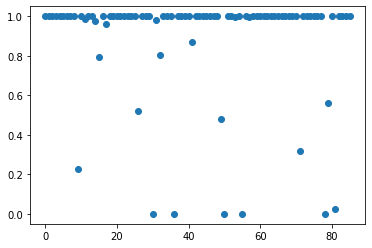

In [117]:
plt.plot(df.Med_likelihood, 'o')

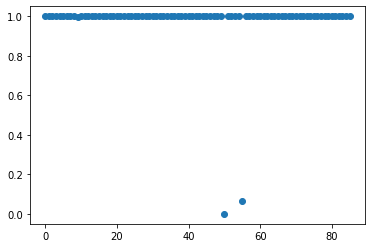

In [118]:
plt.plot(df.max_likelihood, 'o')

## read Data to figure out reading frame problems

In [87]:
name = 'c-10_m11'

direc = r"../../MothLearning/dataFolders/Output/Step5_FilesWith_TrueTrialAnd_ProboscisDetect_v2/"
mothlist = glob.glob(direc + '*.csv')

datafile = [f for f in mothlist if name in f]

In [88]:
data = pd.read_csv(datafile[0])
data.head()

,Unnamed: 0,MothIN,MothOut,ProboscisDetect,DiscoveryTime
0,0,9915,17575,11650.0,1735.0
1,1,18227,22763,20271.0,2044.0
2,2,23984,25286,NaN,NaN
3,3,26840,27401,NaN,NaN
4,4,28618,28977,NaN,NaN


In [89]:
fin = int(data.loc[0,'MothIN'])
fout = int(data.loc[0, 'ProboscisDetect'])
fin, fout

(9915, 11650)

In [90]:
path_for_DLCAnnotation = r"G:\My Drive\Tom-Tanvi\Shared With Bing,Tom and Tanvi\Video Analysis\DeepLabCut-ImageAnalysis\take5\outputFromDLC\VideoResults\EntireDataSet"

In [91]:
DLC_track = glob.glob(path_for_DLCAnnotation + '\\'+ name + 'DeepCut_' +  '*.h5')[0]
# dlc = GetRelevantTrackingData(mothID)

In [92]:
temp = pd.read_hdf(DLC_track)

In [93]:
DLC = temp.loc[slice(None),(slice(None),'proboscisTip')]
DLC = DLC.droplevel(level = [0,1], axis = 1)

In [94]:
tracks = DLC[int(fin):int(fout)].copy()

In [95]:
tracks.head()

coords,x,y,likelihood
9915,324.051880,307.737408,1.0
9916,325.515245,282.587957,1.0
9917,311.666234,293.706818,1.0
9918,308.019510,295.416531,1.0
9919,306.412357,316.172175,1.0


In [96]:
data = [f for f in trackslist if 'c-10_m11' in f][0]
print(data)

file = pd.read_csv(data)
x = file.x.values
y = file.y.values

# if x.size == 0 & y.size == 0:
#     print(n + 'has empty tracks')
#     continue

# x_notinView = x <=5
# y_notinView = y <=5

# x[x_notinView & y_notinView]=np.nan
# y[x_notinView & y_notinView]=np.nan

# if file[x_notinView & y_notinView].size == 0:
#     print(n + 'has effective empty tracks')
#     continue

../dataFolders/PaperPipelineOutput/RawTracks/FirstVisit\c-10_m11_visit_0.csv


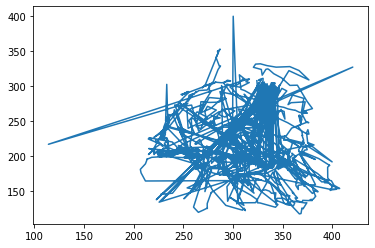

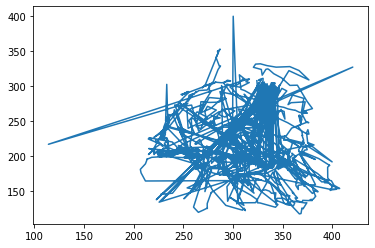

In [97]:
plt.plot(tracks.x.values, tracks.y.values)
plt.show()
plt.plot(file.x.values, file.y.values)
plt.show()